In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Домашнее задание к лекции «Корреляция и корреляционный анализ»

Возьмите датасет Mortality and Water Hardness**
www.kaggle.com...r-hardness

В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

##Задание 1.
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график

Рассчитать коэффициенты корреляции Пирсона и Спирмена

Построить модель линейной регрессии

Рассчитать коэффициент детерминации

Вывести график остатков

In [ ]:
water = pd.read_csv('water.csv')

In [ ]:
water.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [ ]:
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


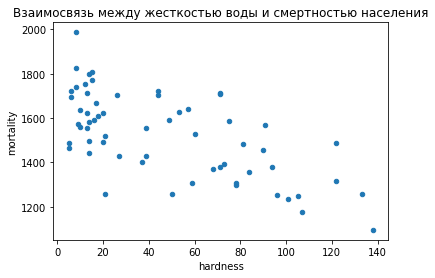

In [ ]:
from numpy.lib.shape_base import tile
# изучаем взаимосвязь между жесткостью воды и смертностью населения
water.plot(kind='scatter', x='hardness', y='mortality', title = 'Взаимосвязь между жесткостью воды и смертностью населения')

In [ ]:
# считаем коэф. корреляции Пирсона
water[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [ ]:
# считаем коэф. корреляции Спирмана
water[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


**Коэффициент корреляции выше среднего, что свидетельствует о возможной связи между жесткостью воды и смертностью(чем меньше жесткость воды, тем больше смертность)**

In [ ]:
X = water[['hardness']]
y = water['mortality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.score(X_test, y_test) #значение коэффициента детерминации

0.5046490611017092

**Коэффициента детерминации показывает, что модель обучилась не очень хорошо и склонна ошибаться**

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [ ]:
remains =[j-k for k, j in zip(y_test, y_pred)]

(array([1., 0., 0., 2., 1., 1., 0., 0., 1., 1., 0., 3., 1., 0., 0., 2., 1.,
        4., 0., 1.]),
 array([-2.62376334e+02, -2.40497332e+02, -2.18618329e+02, -1.96739327e+02,
        -1.74860324e+02, -1.52981322e+02, -1.31102319e+02, -1.09223317e+02,
        -8.73443140e+01, -6.54653115e+01, -4.35863090e+01, -2.17073064e+01,
         1.71696085e-01,  2.20506986e+01,  4.39297011e+01,  6.58087037e+01,
         8.76877062e+01,  1.09566709e+02,  1.31445711e+02,  1.53324714e+02,
         1.75203716e+02]),
 <a list of 20 Patch objects>)

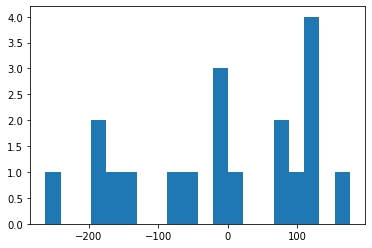

In [ ]:
plt.hist(remains, bins=20)

**График остатков имеет ненормальное распредение, что говорит о том что модель обучилась не очень хорошо и склонна ошибаться**

##Задание 2.

Ответить на вопрос:

сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

In [ ]:
water_south = water[water['location'] == 'South']

In [ ]:
water_south.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73


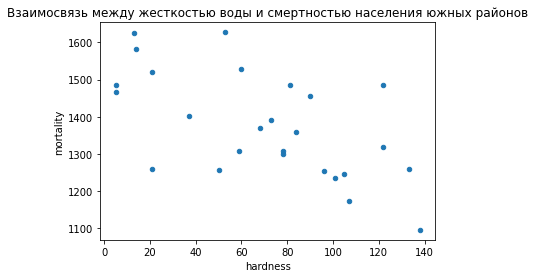

In [ ]:
from numpy.lib.shape_base import tile
# изучаем взаимосвязь между жесткостью воды и смертностью населения южных районов
water_south.plot(kind='scatter', x='hardness', y='mortality', title = 'Взаимосвязь между жесткостью воды и смертностью населения южных районов')

In [ ]:
# считаем коэф. корреляции Пирсона
water_south[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [ ]:
# считаем коэф. корреляции Спирмана
water_south[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


**Коэффициент корреляции выше среднего, что свидетельствует о возможной связи между жесткостью воды и смертностью в южных районах**

In [ ]:
X = water_south[['hardness']]
y = water_south['mortality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.score(X_test, y_test) #значение коэффициента детерминации

-2.5519223012352077

**Коэффицент детерминации говорит о том что прогнозная модель дает результат хуже чем простое усреднение, модель плохо обучилась**

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
remains_south =[j-k for k, j in zip(y_test, y_pred)]

(array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 2., 2., 0., 0.,
        0., 0., 1.]),
 array([-274.41790357, -245.37508605, -216.33226852, -187.289451  ,
        -158.24663348, -129.20381596, -100.16099843,  -71.11818091,
         -42.07536339,  -13.03254587,   16.01027166,   45.05308918,
          74.0959067 ,  103.13872422,  132.18154175,  161.22435927,
         190.26717679,  219.30999431,  248.35281184,  277.39562936,
         306.43844688]),
 <a list of 20 Patch objects>)

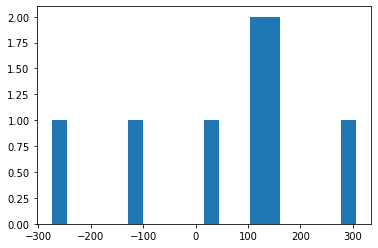

In [ ]:
plt.hist(remains_south, bins=20)

**График остатков имеет ненормальное распредение, что говорит о том что модель обучилась не очень хорошо и склонна ошибаться, возможно нужно больше данных**

In [ ]:
water_north = water[water['location'] == 'North']

In [ ]:
water_north.head()

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15


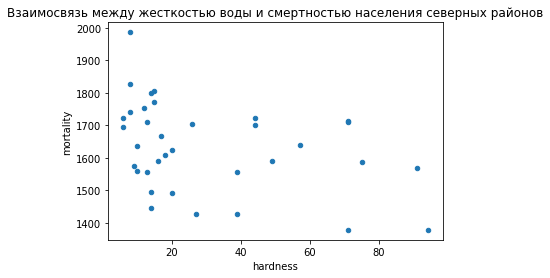

In [ ]:
from numpy.lib.shape_base import tile
# изучаем взаимосвязь между жесткостью воды и смертностью населения южных районов
water_north.plot(kind='scatter', x='hardness', y='mortality', title = 'Взаимосвязь между жесткостью воды и смертностью населения северных районов')

In [ ]:
# считаем коэф. корреляции Пирсона
water_north[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [ ]:
# считаем коэф. корреляции Спирмана
water_north[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


**Коэффициент корреляции ниже среднего, что говорит об очень слабой связи между переменными**

In [ ]:
X = water_north[['hardness']]
y = water_north['mortality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.score(X_test, y_test) #значение коэффициента детерминации

0.018885304285745863

**Коэффицент детерминации говорит о том, что прогнозная модель очень плохо обучилась и склонна ошибаться**

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
remains_north =[j-k for k, j in zip(y_test, y_pred)]

(array([1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0.,
        0., 1., 1.]),
 array([-314.66466905, -288.10772773, -261.55078641, -234.99384508,
        -208.43690376, -181.87996244, -155.32302112, -128.7660798 ,
        -102.20913847,  -75.65219715,  -49.09525583,  -22.53831451,
           4.01862681,   30.57556814,   57.13250946,   83.68945078,
         110.2463921 ,  136.80333342,  163.36027475,  189.91721607,
         216.47415739]),
 <a list of 20 Patch objects>)

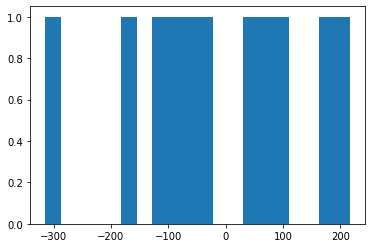

In [ ]:
plt.hist(remains_north, bins=20)

**График остатков имеет ненормальное распредение, что говорит о том что модель обучилась не очень хорошо и склонна ошибаться, возможно смертность и жесткость воды в северных районах не связаны или не хватает больших данных**

***Зависимость сохранилась только для южных районов, можем выдвинуть гипотезу, что существует еще другая переменная влияющая на смертность***
